In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
dfx = pd.read_csv('weightedX.csv')
dfy = pd.read_csv('weightedY.csv')

In [3]:
X = dfx.values
Y = dfy.values

In [4]:
print(X.shape)
print(Y.shape)

(99, 1)
(99, 1)


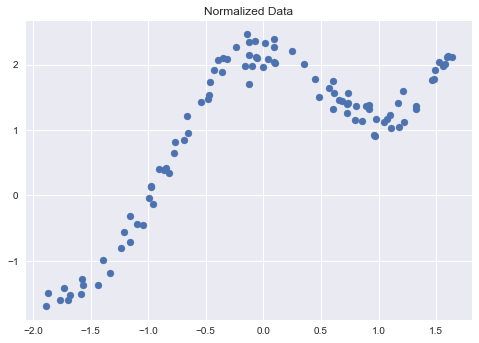

In [5]:
plt.style.use("seaborn")
#Normalisze the Data
u = X.mean()
std = X.std()
X = (X-u)/std

plt.title("Normalized Data")
plt.scatter(X,Y)
plt.show()

In [6]:
def getW(query_point,X,tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))
    
    for i in range(M):
        xi = X[i]
        x  = query_point
        W[i,i] =  np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
    return W

In [7]:
X = np.mat(X)
Y = np.mat(Y)
M = X.shape[0]

W = getW(-1,X,100)
print(W.shape)
print(W)

(99, 99)
[[0.99997933 0.         0.         ... 0.         0.         0.        ]
 [0.         0.99999834 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99997917 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.99994881 0.         0.        ]
 [0.         0.         0.         ... 0.         0.99987121 0.        ]
 [0.         0.         0.         ... 0.         0.         0.99975348]]


In [8]:
# Making Predictions

def predict(X,Y,query_x,tau):
    ones = np.ones((M,1))
    X_ = np.hstack((X,ones))
    
    qx = np.mat([query_x,1])
    
    W = getW(qx,X_,tau)
    
    #theta = `(X′WX)inv * X′WY`
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    #print(theta.shape)
    pred = np.dot(qx,theta)
    return theta,pred

In [9]:
theta,pred = predict(X,Y,1.0,1.0)
print (theta)
print (pred)

[[0.14069504]
 [1.45348191]]
[[1.59417694]]


In [10]:
   # Visualise Predictions , Analyse the Effect of Tau
def plotPrediction(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []

    for xq in X_test:
        theta,pred = predict(X,Y,xq,tau)
        Y_test.append(pred[0][0])

    Y_test = np.array(Y_test)
    XO = np.array(X)
    YO = np.array(Y)

    plt.title("Tau/Bandwidth Param %.2f"% tau)
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test,color='red')
    plt.show()

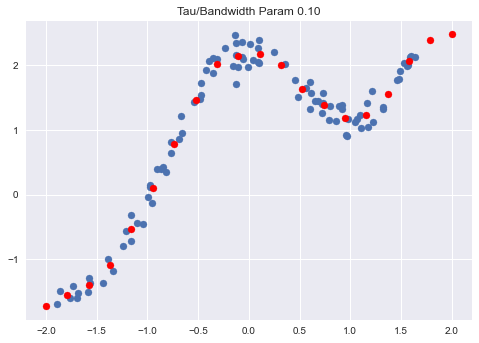

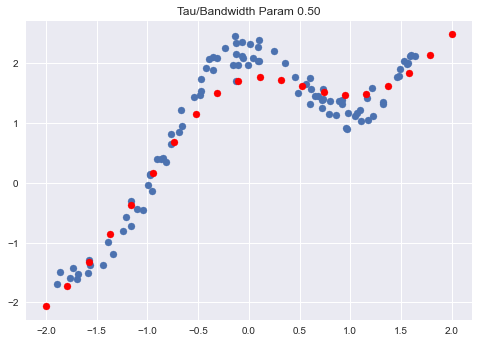

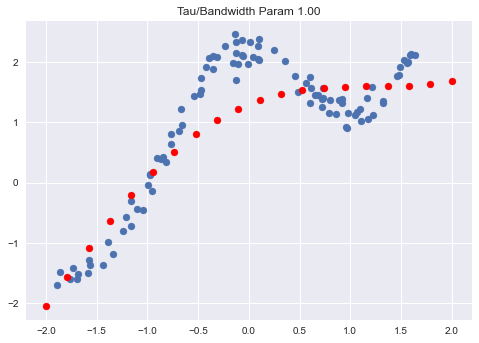

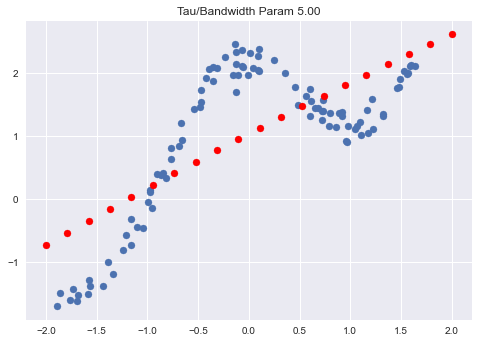

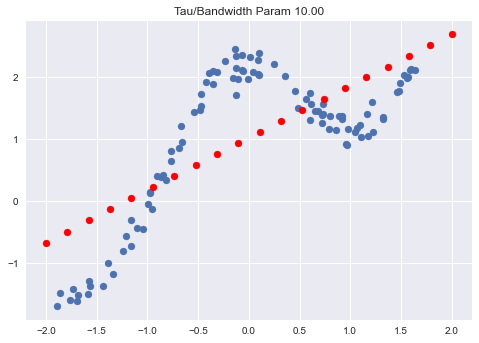

In [11]:
taus = [0.1,0.5,1,5,10]
for t in taus:
    plotPrediction(t)